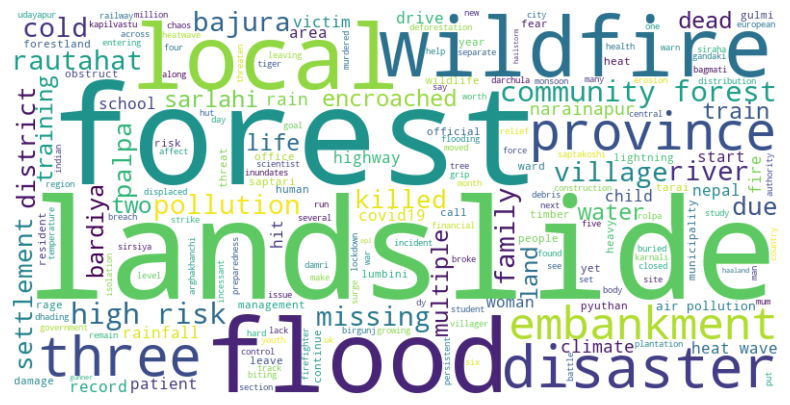

In [14]:
import numpy as np
import os 
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK data files
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

df = pd.read_excel('/Users/shreesaha/Dropbox/Climate Lab NLP/Data/Compiled Data.xlsx')


words_to_check = [
    "floods", "landslide", "hailstorm", "disaster", "lightning", "wildfire", 
    "forest", "rain", "heat", "flood", "embankment", "winter", "cold", 
    "carbon", "pollution", "emissions"
]

# Create the check variable
df['check'] = df['title'].apply(lambda x: 0 if pd.isna(x) else 1 if any(word in x for word in words_to_check) else 0)

#Checking the Data
df.head()

# Filter DataFrame to include only observations where check variable is 1
filtered_df = df[df['check'] == 1]

# Combine titles into the text variable for filtered observations
text = " ".join(filtered_df['title'].dropna())


#Creating the text variable

#text = " ".join(title for title in df.title if pd.notna(title))
#print(text)
# Normalize and clean the text
text = unicodedata.normalize('NFKD', text)\
                 .encode('ascii', 'ignore')\
                 .decode('utf-8', 'ignore')

text = re.sub(r'[^\w\s]', '', text).lower()

# Create tokenizer.
tokenizer = nltk.tokenize.ToktokTokenizer()
# Use tokenizer
text = tokenizer.tokenize(text, return_str = True)

#print(text)
'''
This function takes in a string and returns a string with words stemmed.

# Create porter stemmer.
ps = nltk.porter.PorterStemmer()
    
# Use the stemmer to stem each word in the list of words we created by using split.
stems = [ps.stem(word) for word in text.split()]
    
# Join our lists of words into a string again and assign to a variable.
text = ' '.join(stems)
'''
# Create the lemmatizer.
wnl = WordNetLemmatizer()

# Use the lemmatizer on each word in the list of words we created by using split.
lemmas = [wnl.lemmatize(word) for word in text.split()]

# Join our list of words into a string again and assign to a variable.
text = ' '.join(lemmas)

# Create stopword_list.
stopword_list = stopwords.words('english')
    
# Remove 'exclude_words' from stopword_list to keep these in my text.
#stopword_list = set(stopword_list) - set(exclude_words)
    
# Add in 'extra_words' to stopword_list.
#stopword_list = stopword_list.union(set(extra_words))

# Split words in string.
words = text.split()
    
# Create a list of words from my string with stopwords removed and assign to variable.
filtered_words = [word for word in words if word not in stopword_list]
    
# Join words in the list back into strings and assign to a variable.
string_without_stopwords = ' '.join(filtered_words)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(string_without_stopwords)

#print(string_without_stopwords)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
